In [1]:
## THIS DATASET CONTAINS TRANSACTIONS MADE BY CREDIT CARDS IN SEPTEMBER 2013 BY EUROPEAN CARDHOLDERS
## IT PRESENTS TRANSACTIONS THAT OCCURRED IN TWO DAYS, WHERE WE HAVE 492 FRAUDS OUT OF 284,807 SO THE DATASET IS HIGHLY UNBALANCED.
## OUR GOAL IS TO CORRECTLY IDENTIFY FRAUDULENT CREDIT CARD TRANSACTIONS.

In [2]:
## OVERVIEW
# 1) UNDERSTAND THE DATA (INFO, DESCRIBE, Nº OF MISSING VALUES, ETC...)
# 2) DATA EXPLORATION
# 3) SCALING
# 4) FEATURE ENGINEERING
# 5) OUTLIERS
# 6) RESAMPLING THE DATASET
# 7) MODEL PERFORMANCE
# 8) COMPARE MODELS


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.shape

(284807, 31)

In [9]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
##Unsupervised learning 

In [11]:
df['Amount'].max()

25691.16

In [12]:
df['Amount'].min()

0.0

In [13]:
print('No Frauds',round(100*(df[df['Class'] == 0]['Class'].count()/df.shape[0]),2),'%','of the dataset')
print('Frauds',round(100*(df[df['Class'] == 1]['Class'].count()/df.shape[0]),2),'%','of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [14]:
#highly unbalanced dataset

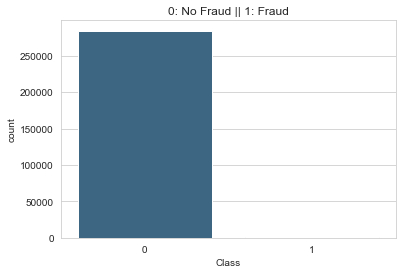

In [15]:
sns.countplot(x='Class',data=df,palette='viridis')
plt.title('0: No Fraud || 1: Fraud')
plt.show()

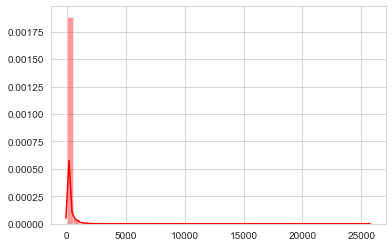

In [16]:
sns.distplot(df['Amount'].values,color='red')

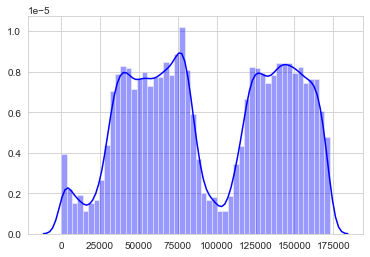

In [17]:
sns.distplot(df['Time'].values,color='blue')

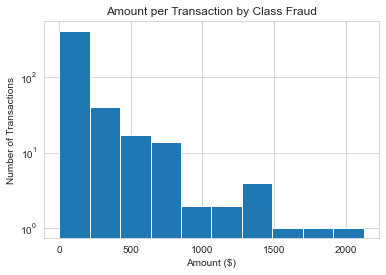

In [18]:
df[df['Class'] == 1]['Amount'].hist()
plt.title('Amount per Transaction by Class Fraud')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.xlabel('Amount ($)')
plt.show()

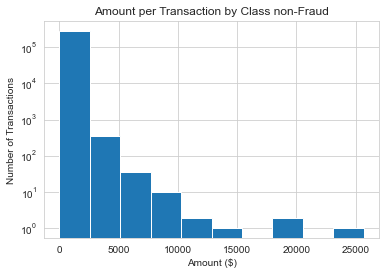

In [19]:
df[df['Class'] == 0]['Amount'].hist()
plt.title('Amount per Transaction by Class non-Fraud')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.xlabel('Amount ($)')
plt.show()

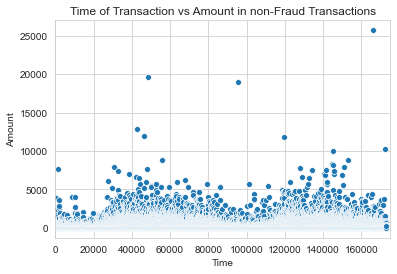

In [20]:
plt.title('Time of Transaction vs Amount in non-Fraud Transactions')
plt.xlabel('Time(s)')
plt.ylabel('Amount($)')
plt.xlim((0,175000))
sns.scatterplot(x='Time',y='Amount',data=df[df['Class']==0])
plt.show()

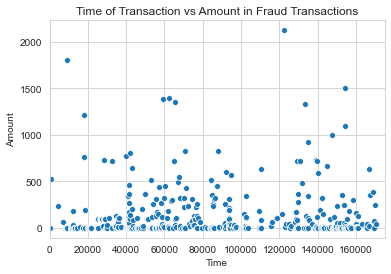

In [21]:
plt.title('Time of Transaction vs Amount in Fraud Transactions')
plt.xlabel('Time(s)')
plt.xlim((0,175000))
plt.ylabel('Amount($)')
sns.scatterplot(x='Time',y='Amount',data=df[df['Class']==1])
plt.show()

In [22]:
#Scaling
#Time and amount should be scaled as the other columns are.
from sklearn.preprocessing import RobustScaler

In [23]:
scale = RobustScaler()
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1,1))

In [24]:
df['Time'] = scale.fit_transform(df['Time'].values.reshape(-1,1))

In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [26]:
df_original = df.copy()

In [27]:
df_original.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [28]:
corr_dict_saleprice = df_original.corr()['Class'].sort_values(ascending=False).to_dict()
important_columns = []
non_important_columns = []
for key,value in corr_dict_saleprice.items():
    if ((value > 0.1) & (value < 0.8)) | (value <= -0.1):
        important_columns.append(key)
    elif (value < 0.1) & (value > -0.1):
        non_important_columns.append(key)

In [29]:
important_columns

['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']

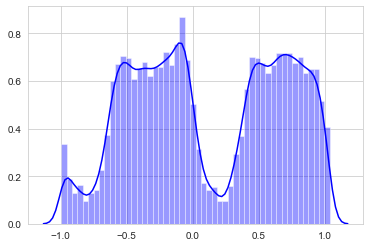

In [30]:
sns.distplot(df_original['Time'].values,color='b')

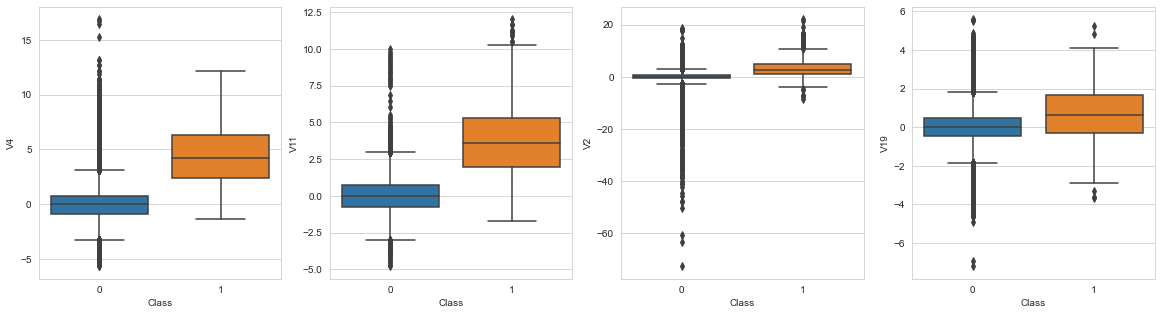

In [31]:
f,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Class',y='V4',data=df_original,ax = axes[0])
sns.boxplot(x='Class',y='V11',data=df_original,ax = axes[1])
sns.boxplot(x='Class',y='V2',data=df_original,ax = axes[2])
sns.boxplot(x='Class',y='V19',data=df_original,ax = axes[3])

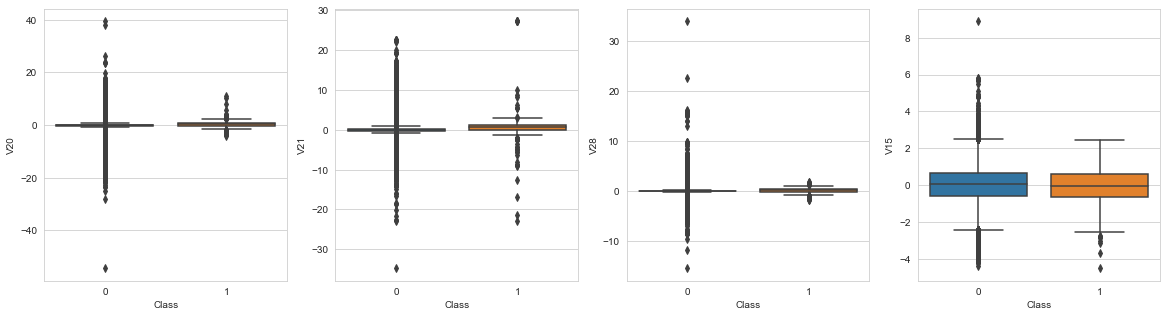

In [32]:
f,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Class',y='V20',data=df_original,ax = axes[0])
sns.boxplot(x='Class',y='V21',data=df_original,ax = axes[1])
sns.boxplot(x='Class',y='V28',data=df_original,ax = axes[2])
sns.boxplot(x='Class',y='V15',data=df_original,ax = axes[3])

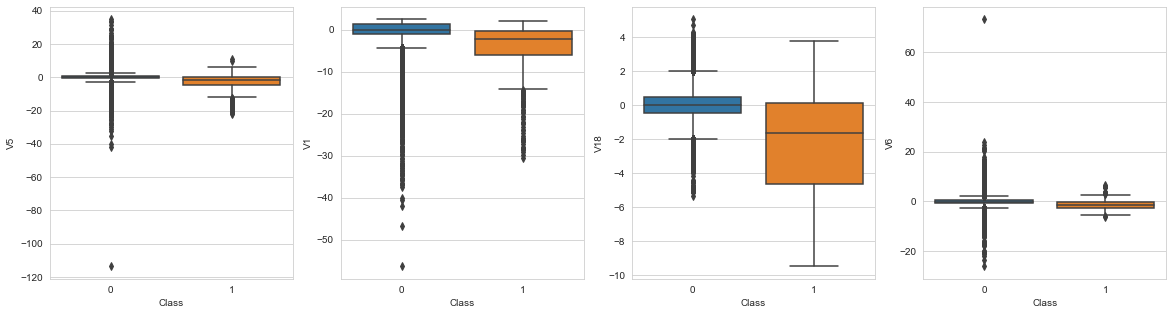

In [33]:
f,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Class',y='V5',data=df_original,ax = axes[0])
sns.boxplot(x='Class',y='V1',data=df_original,ax = axes[1])
sns.boxplot(x='Class',y='V18',data=df_original,ax = axes[2])
sns.boxplot(x='Class',y='V6',data=df_original,ax = axes[3])

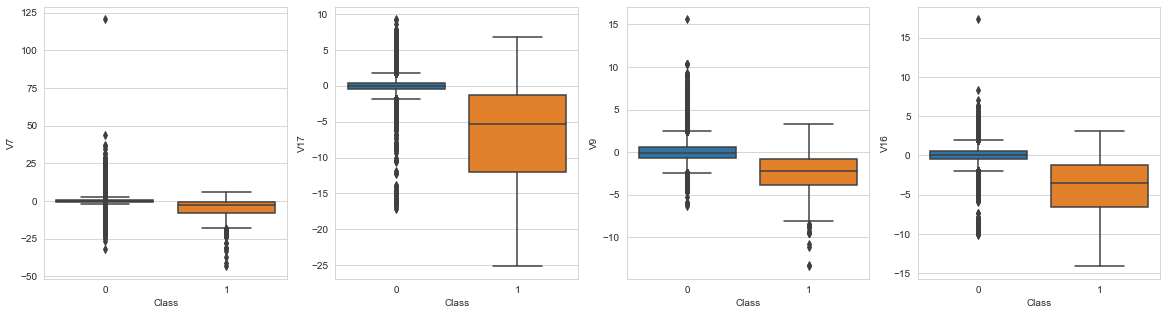

In [34]:
f,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Class',y='V7',data=df_original,ax = axes[0])
sns.boxplot(x='Class',y='V17',data=df_original,ax = axes[1])
sns.boxplot(x='Class',y='V9',data=df_original,ax = axes[2])
sns.boxplot(x='Class',y='V16',data=df_original,ax = axes[3])

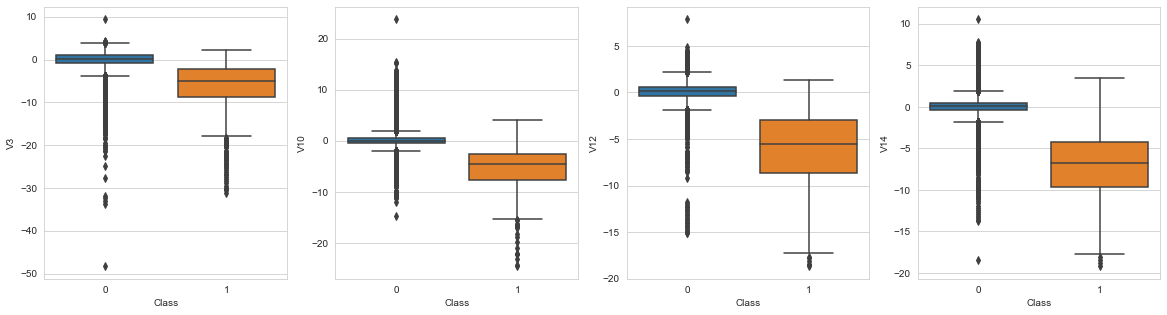

In [35]:
f,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x='Class',y='V3',data=df_original,ax = axes[0])
sns.boxplot(x='Class',y='V10',data=df_original,ax = axes[1])
sns.boxplot(x='Class',y='V12',data=df_original,ax = axes[2])
sns.boxplot(x='Class',y='V14',data=df_original,ax = axes[3])

In [36]:
#Outliers
#Threshold
n = 12

In [37]:
v11_fraud = df_original['V11'].loc[df_original['Class']==1].values
Q1 = np.percentile(v11_fraud,25)
Q3 = np.percentile(v11_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V11'] > upper_limit) | (df_original['V11'] < lower_limit)].index)

In [38]:
v11_non_fraud = df_original['V11'].loc[df_original['Class']==0].values
Q1 = np.percentile(v11_non_fraud,25)
Q3 = np.percentile(v11_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V11'] > upper_limit) | (df_original['V11'] < lower_limit)].index)

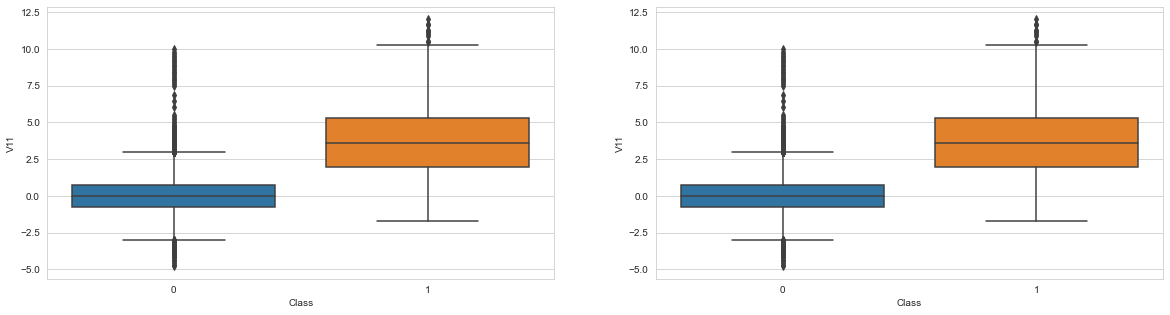

In [39]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V11',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V11',data=df_original,ax = axes[1])

In [40]:
v4_fraud = df_original['V4'].loc[df_original['Class']==1].values
Q1 = np.percentile(v4_fraud,25)
Q3 = np.percentile(v4_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V4'] > upper_limit) | (df_original['V4'] < lower_limit)].index)

In [41]:
v4_non_fraud = df_original['V4'].loc[df_original['Class']==0].values
Q1 = np.percentile(v4_non_fraud,25)
Q3 = np.percentile(v4_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V4'] > upper_limit) | (df_original['V4'] < lower_limit)].index)

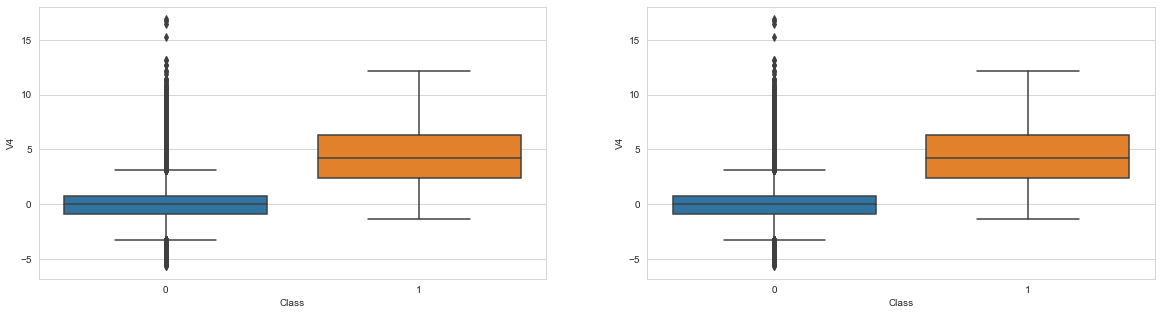

In [42]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V4',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V4',data=df_original,ax = axes[1])

In [43]:
v1_fraud = df_original['V1'].loc[df_original['Class']==1].values
Q1 = np.percentile(v1_fraud,25)
Q3 = np.percentile(v1_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V1'] > upper_limit) | (df_original['V1'] < lower_limit)].index)

In [44]:
v1_non_fraud = df_original['V1'].loc[df_original['Class']==0].values
Q1 = np.percentile(v1_non_fraud,25)
Q3 = np.percentile(v1_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V1'] > upper_limit) | (df_original['V1'] < lower_limit)].index)

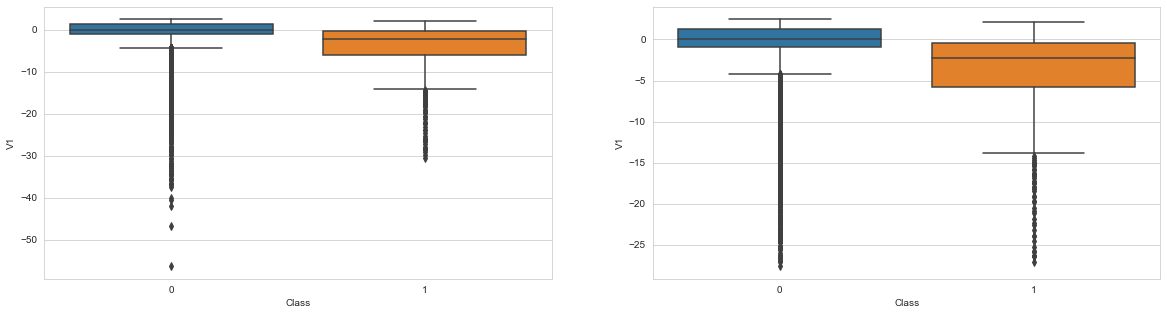

In [45]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V1',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V1',data=df_original,ax = axes[1])

In [46]:
v18_fraud = df_original['V18'].loc[df_original['Class']==1].values
Q1 = np.percentile(v18_fraud,25)
Q3 = np.percentile(v18_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V18'] > upper_limit) | (df_original['V18'] < lower_limit)].index)

In [47]:
v18_non_fraud = df_original['V18'].loc[df_original['Class']==0].values
Q1 = np.percentile(v18_non_fraud,25)
Q3 = np.percentile(v18_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V18'] > upper_limit) | (df_original['V18'] < lower_limit)].index)

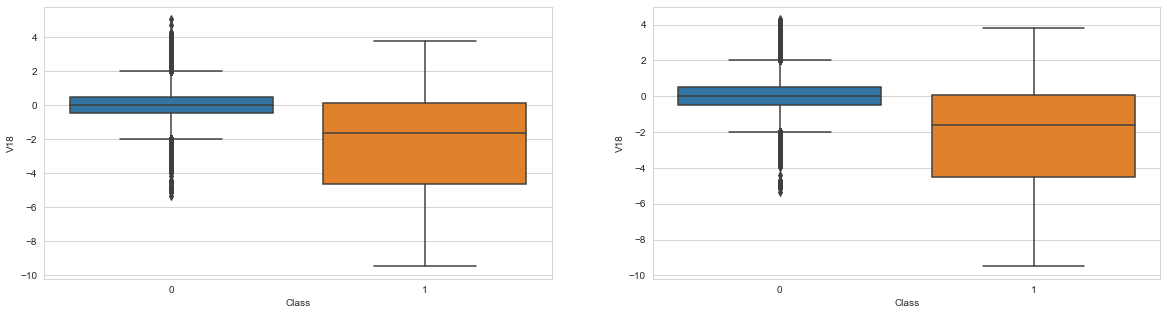

In [48]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V18',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V18',data=df_original,ax = axes[1])

In [49]:
v7_fraud = df_original['V7'].loc[df_original['Class']==1].values
Q1 = np.percentile(v7_fraud,25)
Q3 = np.percentile(v7_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V7'] > upper_limit) | (df_original['V7'] < lower_limit)].index)

In [50]:
v7_non_fraud = df_original['V7'].loc[df_original['Class']==0].values
Q1 = np.percentile(v7_non_fraud,25)
Q3 = np.percentile(v7_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V7'] > upper_limit) | (df_original['V7'] < lower_limit)].index)

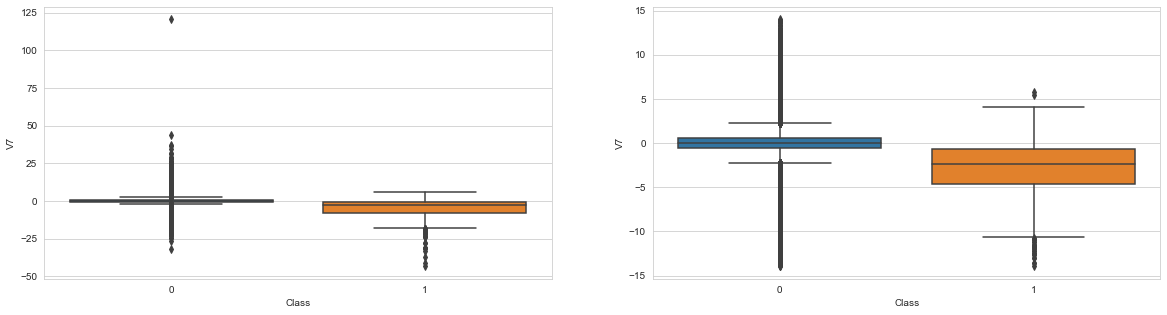

In [51]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V7',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V7',data=df_original,ax = axes[1])

In [52]:
v3_fraud = df_original['V3'].loc[df_original['Class']==1].values
Q1 = np.percentile(v3_fraud,25)
Q3 = np.percentile(v3_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V3'] > upper_limit) | (df_original['V3'] < lower_limit)].index)

In [53]:
v3_non_fraud = df_original['V3'].loc[df_original['Class']==0].values
Q1 = np.percentile(v3_non_fraud,25)
Q3 = np.percentile(v3_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V3'] > upper_limit) | (df_original['V3'] < lower_limit)].index)

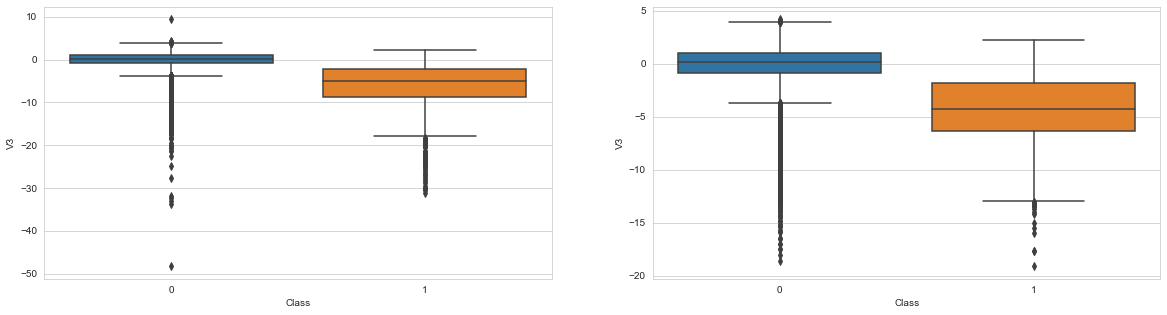

In [54]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V3',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V3',data=df_original,ax = axes[1])

In [55]:
v16_fraud = df_original['V16'].loc[df_original['Class']==1].values
Q1 = np.percentile(v16_fraud,25)
Q3 = np.percentile(v16_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V16'] > upper_limit) | (df_original['V16'] < lower_limit)].index)

In [56]:
v16_non_fraud = df_original['V16'].loc[df_original['Class']==0].values
Q1 = np.percentile(v16_non_fraud,25)
Q3 = np.percentile(v16_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V16'] > upper_limit) | (df_original['V16'] < lower_limit)].index)

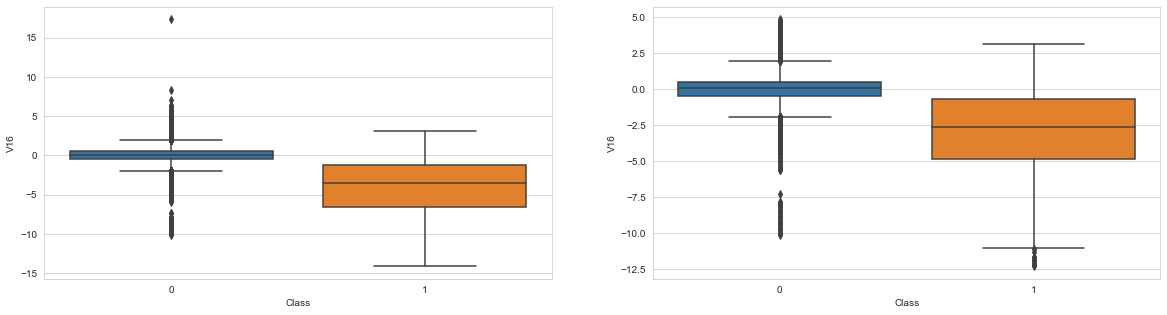

In [57]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V16',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V16',data=df_original,ax = axes[1])

In [58]:
v10_fraud = df_original['V10'].loc[df_original['Class']==1].values
Q1 = np.percentile(v10_fraud,25)
Q3 = np.percentile(v10_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V10'] > upper_limit) | (df_original['V10'] < lower_limit)].index)

In [59]:
v10_non_fraud = df_original['V10'].loc[df_original['Class']==0].values
Q1 = np.percentile(v10_non_fraud,25)
Q3 = np.percentile(v10_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V10'] > upper_limit) | (df_original['V10'] < lower_limit)].index)

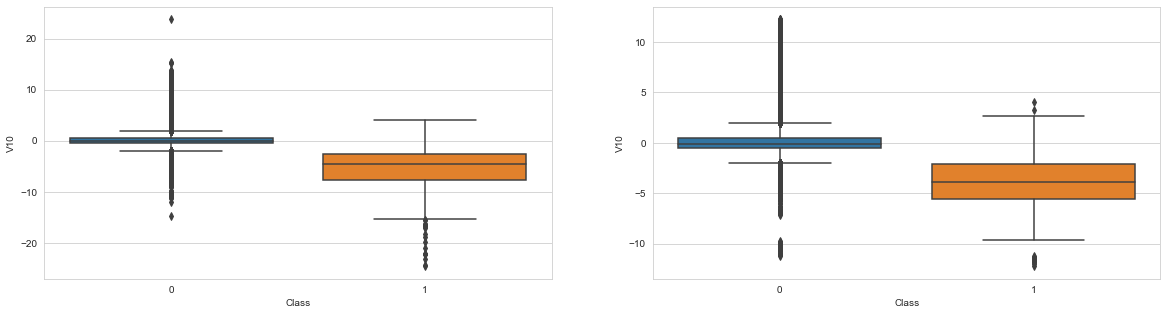

In [60]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V10',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V10',data=df_original,ax = axes[1])

In [61]:
v12_fraud = df_original['V12'].loc[df_original['Class']==1].values
Q1 = np.percentile(v12_fraud,25)
Q3 = np.percentile(v12_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V12'] > upper_limit) | (df_original['V12'] < lower_limit)].index)

In [62]:
v12_non_fraud = df_original['V12'].loc[df_original['Class']==0].values
Q1 = np.percentile(v12_non_fraud,25)
Q3 = np.percentile(v12_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V12'] > upper_limit) | (df_original['V12'] < lower_limit)].index)

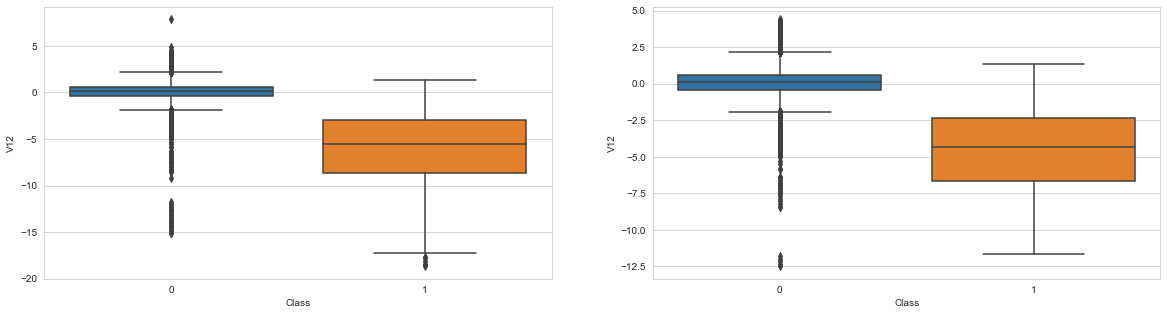

In [63]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V12',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V12',data=df_original,ax = axes[1])

In [64]:
v14_fraud = df_original['V14'].loc[df_original['Class']==1].values
Q1 = np.percentile(v14_fraud,25)
Q3 = np.percentile(v14_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V14'] > upper_limit) | (df_original['V14'] < lower_limit)].index)

In [65]:
v14_non_fraud = df_original['V14'].loc[df_original['Class']==0].values
Q1 = np.percentile(v14_non_fraud,25)
Q3 = np.percentile(v14_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V14'] > upper_limit) | (df_original['V14'] < lower_limit)].index)

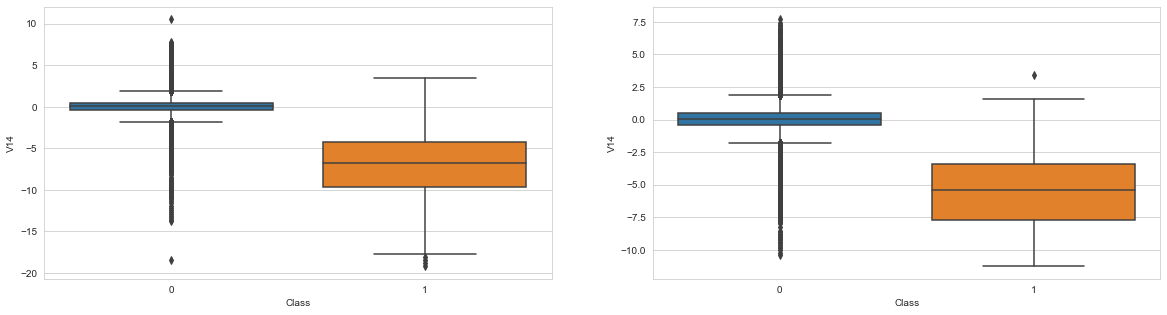

In [66]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V14',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V14',data=df_original,ax = axes[1])

In [67]:
v17_fraud = df_original['V17'].loc[df_original['Class']==1].values
Q1 = np.percentile(v17_fraud,25)
Q3 = np.percentile(v17_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V17'] > upper_limit) | (df_original['V17'] < lower_limit)].index)

In [68]:
v17_non_fraud = df_original['V17'].loc[df_original['Class']==0].values
Q1 = np.percentile(v17_non_fraud,25)
Q3 = np.percentile(v17_non_fraud,75)
IIQ = Q3-Q1
lower_limit = Q1 - n*IIQ
upper_limit = Q3 + n*IIQ
df_original = df_original.drop(df_original[(df_original['V17'] > upper_limit) | (df_original['V17'] < lower_limit)].index)

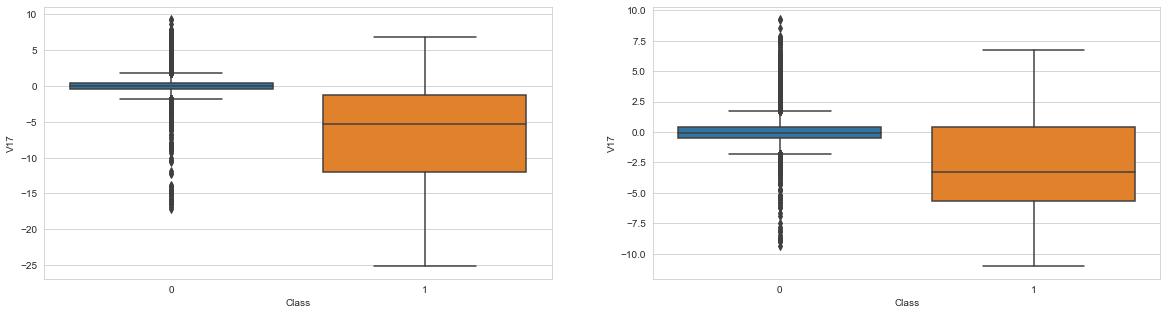

In [69]:
f,axes = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(x='Class',y='V17',data=df,ax = axes[0])
sns.boxplot(x='Class',y='V17',data=df_original,ax = axes[1])

In [70]:
print('Dataframe Shape:',df.shape)
print('Dataframe Shape without outliers :',df_original.shape)

Dataframe Shape: (284807, 31)
Dataframe Shape without outliers : (284442, 31)


In [71]:
#Since our data is highly unbalanced we need to create a sub sumple of the dataframe.

In [72]:
#There are several ways to create sub sumple of  data:
# 1)Under-Sampling.
# 2)Over-Sampling.
# 3)SMOTE.



In [73]:
# Lets start with UNDER-Sample since it is the easiest aprroach.
# We should take into account that UNDER-Sampling tends to Overfitting.

In [74]:
#our sub sample will be a dataframe with a 50/50 ratio of Fraud and non-Fraud transactions  

In [75]:
from sklearn.utils import resample

In [76]:
X = df_original.drop('Class',axis=1)
y = df_original['Class']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [78]:
X = pd.concat([X_train,y_train],axis=1)

In [79]:
no_fraud = X[X['Class']==0]
fraud = X[X['Class']==1]

In [80]:
no_fraud_undersampled = resample(no_fraud,replace=False,n_samples=len(fraud),random_state=27)

In [81]:
len(no_fraud_undersampled)

243

In [82]:
undersample = pd.concat([fraud,no_fraud_undersampled])

In [83]:
undersample['Class'].value_counts()

1    243
0    243
Name: Class, dtype: int64

In [84]:
y_train = undersample['Class']
X_train = undersample.drop('Class',axis=1)

In [85]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [86]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel_under = LogisticRegression()
logmodel_under.fit(X_train,y_train)
pred_log = logmodel_under.predict(X_test)
acc_log = round(accuracy_score(y_test,pred_log),4)
f1_log = round(f1_score(y_test,pred_log),4)
rec_log = round(recall_score(y_test,pred_log),4)


In [87]:
print('Accuracy:',acc_log)
print('F1 score:',f1_log)
print('Recall:',rec_log)

Accuracy: 0.9357
F1 score: 0.0314
Recall: 0.881


In [88]:
#Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree_under = DecisionTreeClassifier()
dtree_under.fit(X_train,y_train)
pred_tree = dtree_under.predict(X_test)
acc_tree = round(accuracy_score(y_test,pred_tree),4)
f1_tree = round(f1_score(y_test,pred_tree),4)
rec_tree = round(recall_score(y_test,pred_tree),4)

In [89]:
print('Accuracy:',acc_tree)
print('F1 score:',f1_tree)
print('Recall:',rec_tree)

Accuracy: 0.8607
F1 score: 0.0141
Recall: 0.8452


In [90]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc_under = RandomForestClassifier(n_estimators=100)
rfc_under.fit(X_train,y_train)
pred_rfc = rfc_under.predict(X_test)
acc_rfc = round(accuracy_score(y_test,pred_rfc),4)
f1_rfc = round(f1_score(y_test,pred_rfc),4)
rec_rfc = round(recall_score(y_test,pred_rfc),4)


In [91]:
print('Accuracy:',acc_rfc)
print('F1 score:',f1_rfc)
print('Recall:',rec_rfc)

Accuracy: 0.9605
F1 score: 0.0468
Recall: 0.8214


In [92]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_under = KNeighborsClassifier()
knn_under.fit(X_train,y_train)
pred_knn = knn_under.predict(X_test)
acc_knn = round(accuracy_score(y_test,pred_knn),4)
f1_knn = round(f1_score(y_test,pred_knn),4)
rec_knn = round(recall_score(y_test,pred_knn),4)

In [93]:
print('Accuracy:',acc_knn)
print('F1 score:',f1_knn)
print('Recall:',rec_knn)

Accuracy: 0.9488
F1 score: 0.036
Recall: 0.8095


In [94]:
#SVC
from sklearn.svm import SVC
svc_model_under = SVC(probability=True)
svc_model_under.fit(X_train,y_train)
pred_svc = svc_model_under.predict(X_test)
acc_svc = round(accuracy_score(y_test,pred_svc),4)
f1_svc = round(f1_score(y_test,pred_svc),4)
rec_svc = round(recall_score(y_test,pred_svc),4)

In [95]:
print('Accuracy:',acc_svc)
print('F1 score:',f1_svc)
print('Recall:',rec_svc)

Accuracy: 0.955
F1 score: 0.0419
Recall: 0.8333


In [96]:
models = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','KNN','SVC','Random Forest'],'Accuracy':[acc_log,acc_tree,acc_knn,acc_svc,acc_rfc],'F1-score':[f1_log,f1_tree,f1_knn,f1_svc,f1_rfc],'Recall':[rec_log,rec_tree,rec_knn,rec_svc,rec_rfc]}).sort_values('Recall',ascending=False)

In [97]:
models

,Model,Accuracy,F1-score,Recall
0,Logistic Regression,0.9357,0.0314,0.8810
1,Decision Tree,0.8607,0.0141,0.8452
3,SVC,0.9550,0.0419,0.8333
4,Random Forest,0.9605,0.0468,0.8214
2,KNN,0.9488,0.0360,0.8095


In [98]:
#Over-Sampling.

In [99]:
fraud_oversampled = resample(fraud,replace=True,n_samples=len(no_fraud),random_state=27)

In [100]:
oversample = pd.concat([no_fraud,fraud_oversampled])

In [101]:
oversample['Class'].value_counts()

1    213088
0    213088
Name: Class, dtype: int64

In [102]:
y_train = oversample['Class']
X_train = oversample.drop('Class',axis=1)

In [103]:
#Logistic Regression
logmodel_over = LogisticRegression()
logmodel_over.fit(X_train,y_train)
pred_log = logmodel_over.predict(X_test)
acc_log_over = round(accuracy_score(y_test,pred_log),4)
f1_log_over = round(f1_score(y_test,pred_log),4)
rec_log_over = round(recall_score(y_test,pred_log),4)


In [104]:
print('Accuracy:',acc_log_over)
print('F1 score:',f1_log_over)
print('Recall:',rec_log_over)

Accuracy: 0.9681
F1 score: 0.0604
Recall: 0.869


In [105]:
#Tree Classifier
dtree_over = DecisionTreeClassifier()
dtree_over.fit(X_train,y_train)
pred_tree = dtree_over.predict(X_test)
acc_tree_over = round(accuracy_score(y_test,pred_tree),4)
f1_tree_over = round(f1_score(y_test,pred_tree),4)
rec_tree_over = round(recall_score(y_test,pred_tree),4)

In [106]:
print('Accuracy:',acc_tree_over)
print('F1 score:',f1_tree_over)
print('Recall:',rec_tree_over)


Accuracy: 0.9992
F1 score: 0.6364
Recall: 0.5833


In [107]:
#RandomForest
rfc_over = RandomForestClassifier(n_estimators=100)
rfc_over.fit(X_train,y_train)
pred_rfc = rfc_over.predict(X_test)
acc_rfc_over = round(accuracy_score(y_test,pred_rfc),4)
f1_rfc_over = round(f1_score(y_test,pred_rfc),4)
rec_rfc_over = round(recall_score(y_test,pred_rfc),4)

In [108]:
print('Accuracy:',acc_rfc_over)
print('F1 score:',f1_rfc_over)
print('Recall:',rec_rfc_over)

Accuracy: 0.9995
F1 score: 0.7413
Recall: 0.631


In [109]:
#KNN
knn_over = KNeighborsClassifier()
knn_over.fit(X_train,y_train)
pred_knn = knn_over.predict(X_test)
acc_knn_over = round(accuracy_score(y_test,pred_knn),4)
f1_knn_over = round(f1_score(y_test,pred_knn),4)
rec_knn_over = round(recall_score(y_test,pred_knn),4)

In [110]:
print('Accuracy:',acc_knn_over)
print('F1 score:',f1_knn_over)
print('Recall:',rec_knn_over)

Accuracy: 0.999
F1 score: 0.6344
Recall: 0.7024


In [111]:
models2 = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','KNN','Random Forest'],'Accuracy':[acc_log_over,acc_tree_over,acc_knn_over,acc_rfc_over],'F1-score':[f1_log_over,f1_tree_over,f1_knn_over,f1_rfc_over],'Recall':[rec_log_over,rec_tree_over,rec_knn_over,rec_rfc_over]}).sort_values('Recall',ascending=False)

In [112]:
models2

,Model,Accuracy,F1-score,Recall
0,Logistic Regression,0.9681,0.0604,0.8690
2,KNN,0.9990,0.6344,0.7024
3,Random Forest,0.9995,0.7413,0.6310
1,Decision Tree,0.9992,0.6364,0.5833


In [113]:
print(models)
print('*******************************************************')
print(models2)

                 Model  Accuracy  F1-score  Recall
0  Logistic Regression    0.9357    0.0314  0.8810
1        Decision Tree    0.8607    0.0141  0.8452
3                  SVC    0.9550    0.0419  0.8333
4        Random Forest    0.9605    0.0468  0.8214
2                  KNN    0.9488    0.0360  0.8095
*******************************************************
                 Model  Accuracy  F1-score  Recall
0  Logistic Regression    0.9681    0.0604  0.8690
2                  KNN    0.9990    0.6344  0.7024
3        Random Forest    0.9995    0.7413  0.6310
1        Decision Tree    0.9992    0.6364  0.5833


In [114]:
#Due to the imbalacing of the Data, many cases could be predicted as False Negatives, meaning we actually predict them as normal
#transactions, but they are in fact fraudalent ones. That makes Recall the most important score here.
#Precison will suffer a lot. However, if we predict that a transaction is fraudulent and turns out not to be, 
#is not a huge problem compared to the other way around.
#In conclusion: a high recall is needed for this model.
#We can always find a trade-off (F1-Score) between precision and recall by finding a good recall and not a huge affected precision. 
 

In [115]:
#Undersampling underperformed oversampling in this case. However, we obtained a very low F1-Score. 

In [116]:
#I will try to implement SMOTE in future versions of the code to see if that can improve our F1-score.

In [117]:
#Lets go with the whole dataset
X_original = df_original.drop('Class',axis=1).values
y_original = df_original['Class'].values

In [118]:
from sklearn.model_selection import train_test_split
X_original_train,X_original_test,y_original_train,y_original_test = train_test_split(X_original,y_original,test_size=0.25,random_state=101)

In [119]:
# train and test are similarly distributed?
train_unique, train_counts = np.unique(y_original_train,return_counts=True)
test_unique, test_counts = np.unique(y_original_test,return_counts=True)
print(train_counts/len(y_original_train))
print(test_counts/len(y_original_test))


[0.99886093 0.00113907]
[0.99881875 0.00118125]


In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
#Decision Tree
preds_tree = dtree_under.predict(X_original_test)
print(confusion_matrix(y_original_test,preds_tree))
print('\n')
print(classification_report(y_original_test,preds_tree))


[[61136  9891]
 [   13    71]]


              precision    recall  f1-score   support

           0       1.00      0.86      0.93     71027
           1       0.01      0.85      0.01        84

    accuracy                           0.86     71111
   macro avg       0.50      0.85      0.47     71111
weighted avg       1.00      0.86      0.92     71111



In [124]:
#Random Forest
preds_rfc = rfc_under.predict(X_original_test)
print(confusion_matrix(y_original_test,preds_rfc))
print('\n')
print(classification_report(y_original_test,preds_rfc))


[[68231  2796]
 [   15    69]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71027
           1       0.02      0.82      0.05        84

    accuracy                           0.96     71111
   macro avg       0.51      0.89      0.51     71111
weighted avg       1.00      0.96      0.98     71111



In [125]:
#Logistic Regression
preds_log = logmodel_under.predict(X_original_test)
print(confusion_matrix(y_original_test,preds_log))
print('\n')
print(classification_report(y_original_test,preds_log))



[[66467  4560]
 [   10    74]]


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71027
           1       0.02      0.88      0.03        84

    accuracy                           0.94     71111
   macro avg       0.51      0.91      0.50     71111
weighted avg       1.00      0.94      0.97     71111



In [126]:
#SVC
preds_svc = svc_model_under.predict(X_original_test)
print(confusion_matrix(y_original_test,preds_svc))
print('\n')
print(classification_report(y_original_test,preds_svc))


[[67841  3186]
 [   14    70]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71027
           1       0.02      0.83      0.04        84

    accuracy                           0.95     71111
   macro avg       0.51      0.89      0.51     71111
weighted avg       1.00      0.95      0.98     71111



In [127]:
#KNN
preds_knn = knn_under.predict(X_original_test)
print(confusion_matrix(y_original_test,preds_knn))
print('\n')
print(classification_report(y_original_test,preds_knn))


[[67403  3624]
 [   16    68]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71027
           1       0.02      0.81      0.04        84

    accuracy                           0.95     71111
   macro avg       0.51      0.88      0.50     71111
weighted avg       1.00      0.95      0.97     71111



In [128]:
#We can conclude that the model that fits the best is Logistic Regression.

print('Recall of our best model:',round(recall_score(y_original_test,preds_log),4))


Recall of our best model: 0.881
